In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Зашумить изображение при помощи шума гаусса, постоянного шума.

In [3]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray,noise_gauss)

In [5]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

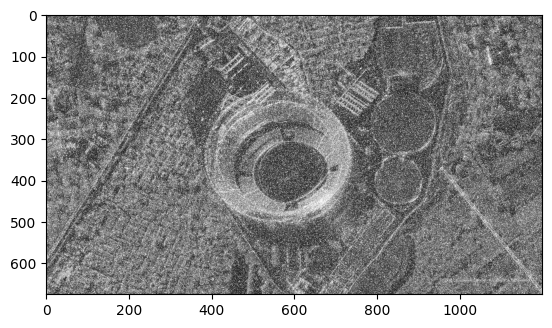

In [6]:
plt.imshow(image_noise_gauss, cmap="gray")

In [7]:
noise_uniform = np.random.uniform(-25, 25, image_gray.shape).astype(np.uint8)

In [12]:
image_noise_uniform = cv2.add(image_gray, noise_uniform)

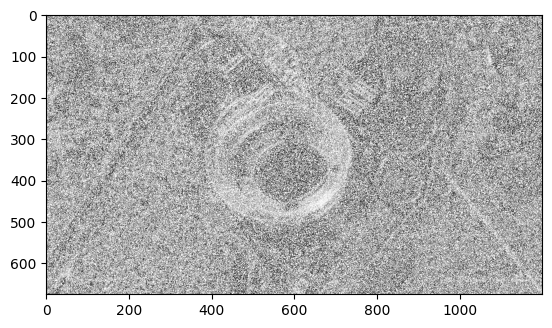

In [13]:
plt.imshow(image_noise_uniform, cmap="gray")

# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [ ]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 7)

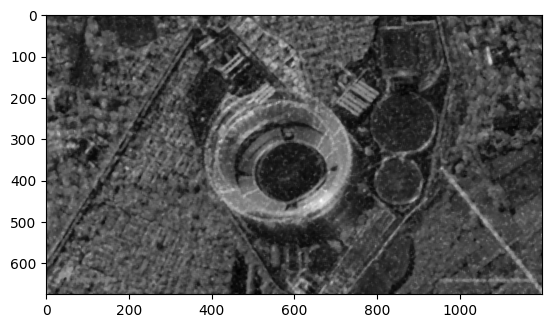

In [ ]:
plt.imshow(image_gauss_median, cmap="gray")

In [ ]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(7,7),0)

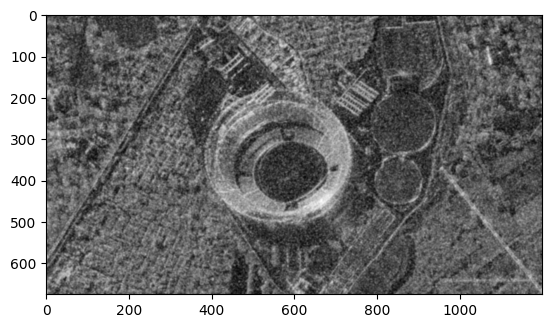

In [ ]:
plt.imshow(image_gauss_gauss, cmap="gray")

In [ ]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,7,70,70)

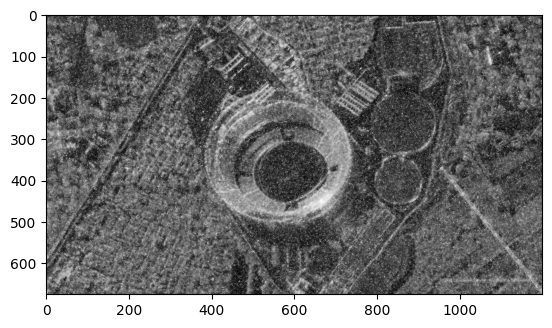

In [ ]:
plt.imshow(image_gauss_bilat, cmap="gray")

In [ ]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 17)

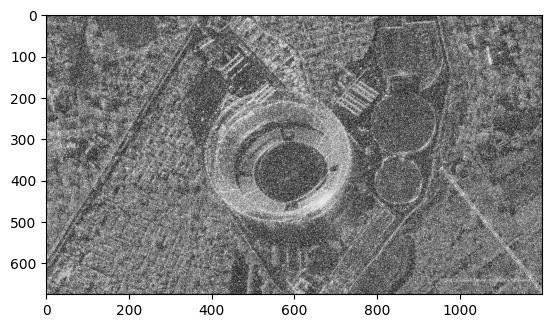

In [ ]:
plt.imshow(image_gauss_nlm, cmap="gray")

# Лучишй фильтр

In [ ]:
best_mse = float('inf')
best_ssim = -1
best_filter = ""

In [ ]:
filters = [
    ('Медианный', image_gauss_median),
    ('Гаусс', image_gauss_gauss),
    ('Билатеральный', image_gauss_bilat),
    ('NLM', image_gauss_nlm)
]

In [ ]:
for name, filtered_image in filters:
    mse = mean_squared_error(image_gray, filtered_image)
    ssim = structural_similarity(image_gray, filtered_image)

    print(f"{name}: MSE={mse}, SSIM={ssim}")

    if mse < best_mse and ssim > best_ssim:
        best_mse = mse
        best_ssim = ssim
        best_filter = name

Медианный: MSE=682.5692432098765, SSIM=0.43355417541512586
Гаусс: MSE=1721.1959543209878, SSIM=0.4925491444671257
Билатеральный: MSE=1998.8173283950616, SSIM=0.30611682772290305
NLM: MSE=4230.08917037037, SSIM=0.18713086861311803


In [ ]:
print(f"{best_filter}: MSE={best_mse}, SSIM={best_ssim}")

Медианный: MSE=682.5692432098765, SSIM=0.43355417541512586
